<a href="https://colab.research.google.com/github/min02choi/Style-Color-Detect/blob/main/240526_generate_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

스타일을 한정하여
1. 해당 스타일에서 그라데이션 영역을 알아내기
  - 원본 이미지에서 좌 우로의 픽셀 차를 구해서 변화량(차이)이 있는 부분이 그라데이션이 적용된 구간임
2. 해당 영역 안에서 그라데이션이 적용된 각도 구하기
3. 2번을 활용해서 그라데이션이 적용된 두 개의 색 알아내기
***
4. 번역된 글자로 텍스트를 만들고(ex. 영어) 해당 텍스트를 포함하는 가장 작은 직사각형을 그림
5. 4에서 구한 직사각형에 아까 구한 정보로 그라데이션을 구현
6. 해당 영역에 대해 픽셀 값 옮기기
  - 만든 텍스트에 대해서 레이블 이미지가 필요할 것 같음


## 1. 해당 텍스트에서 그라데이션이 적용된 영역을 알아내기

In [37]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import math

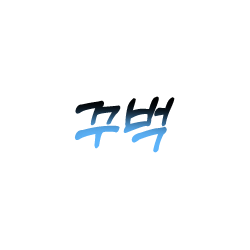

(250, 250, 4)


In [34]:
IMAGE_PATH = "꾸벅.png"

image = cv2.imread(IMAGE_PATH, cv2.IMREAD_UNCHANGED)
cv2_imshow(image)
print(image.shape)

In [18]:
# 그라데이션이 적용된 영역을 반환
def getGradationPart(image, num):
    hist = []
    # 각 픽셀의 화소값
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            hist.append(tuple(image[i, j]))

    # 픽셀 색상별 등장 횟수 계산
    color_counts = {}
    for color in hist:
        if color in color_counts:
            color_counts[color] += 1
        else:
            color_counts[color] = 1

    sorted_colors = sorted(color_counts.items(), key=lambda x: x[1], reverse=True)
    print(sorted_colors)
    print(len(sorted_colors))

    # 명확한 색 판별
    # 자르는 임계 선이 필요할 듯
    color_list = []
    for i in range(len(sorted_colors) - 1):
        if (sorted_colors[i][0][3] == 0):
            pass
        elif (sorted_colors[i][1] > sorted_colors[i+1][1] * 3):
            color_list.append(sorted_colors[i])
            break

    print(color_list)


    # 빈 이미지 생성 (모든 픽셀이 0으로 초기화된 배열)

    label_image = image.copy()
    only_grad_image = image.copy()

    # "그라데이션이 아님"이 명확한 부분은 (0, 0, 0, 0)으로 변환
    # 알파 값이 0인 부분, 앞서 구한 빈도 수 높은 색인 경우
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # print(image[i][j][0:3], color_list[0][0:3])
            # print(image[i][j])
            if image[i][j][3] == 0:
                label_image[i][j] = (0, 0, 0, 0)
                only_grad_image[i][j] = (0, 0, 0, 0)
            elif any(np.array_equal(image[i][j][0:3], color[0][0:3]) for color in color_list):
                only_grad_image[i][j] = (0, 0, 0, 0)
                label_image[i][j] = (130, 130, 130, 255)

            else:
                label_image[i][j] = (0, 0, 0, 255)

    return label_image, only_grad_image


(250, 250, 4)
[((255, 255, 255, 0), 55415), ((0, 0, 0, 0), 2491), ((255, 255, 255, 255), 1406), ((255, 255, 255, 228), 77), ((251, 180, 93, 255), 44), ((255, 255, 255, 127), 39), ((255, 255, 255, 213), 37), ((255, 255, 255, 142), 34), ((255, 255, 255, 23), 31), ((255, 255, 255, 170), 30), ((255, 255, 255, 1), 28), ((255, 255, 255, 11), 28), ((255, 255, 255, 47), 25), ((32, 23, 12, 255), 25), ((255, 255, 255, 95), 24), ((255, 255, 255, 29), 22), ((255, 255, 255, 158), 22), ((255, 255, 255, 233), 22), ((255, 255, 255, 2), 21), ((255, 255, 255, 5), 21), ((255, 255, 255, 185), 20), ((255, 255, 255, 71), 20), ((233, 167, 86, 255), 19), ((243, 174, 90, 255), 19), ((244, 175, 90, 255), 19), ((255, 255, 255, 244), 18), ((255, 255, 255, 65), 17), ((255, 255, 255, 59), 17), ((255, 255, 255, 199), 17), ((240, 172, 89, 255), 17), ((255, 255, 255, 17), 16), ((26, 19, 10, 255), 16), ((255, 255, 255, 212), 15), ((255, 255, 255, 31), 14), ((255, 255, 255, 35), 14), ((7, 5, 3, 255), 14), ((237, 170, 88

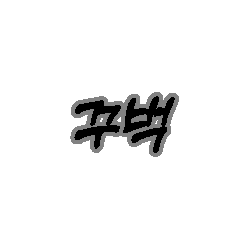

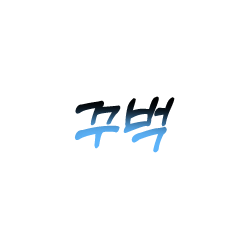

In [35]:
print(image.shape)
label_image, only_grad_image = getGradationPart(image, 2)
cv2_imshow(label_image)
cv2_imshow(only_grad_image)

## 2. 해당 영역 안에서 그라데이션이 적용된 각도 구하기

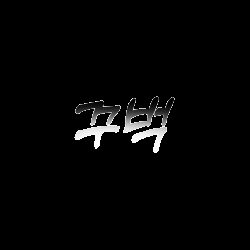

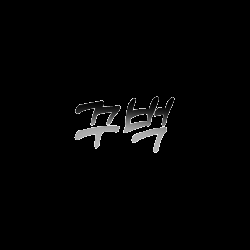

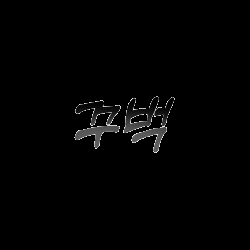

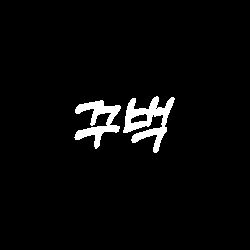

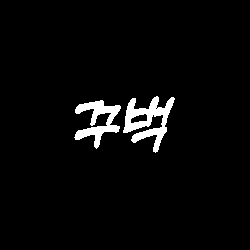

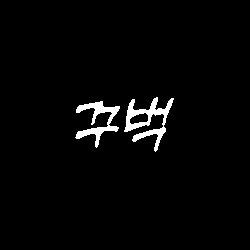

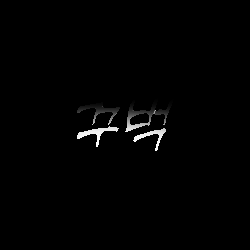

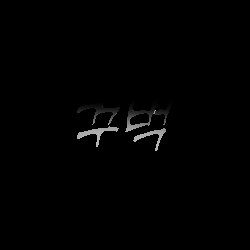

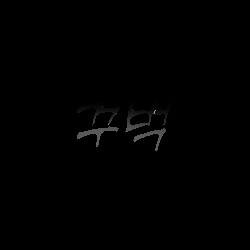

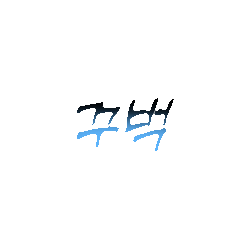

B:  -88.02137281079494 -0.03162714830556177 0.9154739799717594 860
G:  -88.09882147186859 -0.030321359564722594 0.9134588132107354 846
R:  -87.46003704576805 -0.039850592681320775 0.8983496660500732 791
밝기 기울기(x, y화소당) =  272.1540028492344 0.05922610144900414 1.5746528931577195


In [38]:
# 이미지 가장자리의 노이즈를 없애기 위해 침식 작용 - 사용 여부 추후 고민
kernel = np.ones((2,2),np.uint8)

# 이미지 침식 수행
eroded_image = cv2.erode(label_image, kernel, iterations = 2)
# cv2_imshow(eroded_image)


# 1단계: 텍스트와 배경(효과) 영역을 제외한 바탕영역 삭제
# 내가 봤을 때는 이게 그라데이션 부분의 이미지여야 함

# b, g, r, a = cv2.split(original_image)
b, g, r, a = cv2.split(only_grad_image)
cv2_imshow(b)
cv2_imshow(g)
cv2_imshow(r)
cv2_imshow(a)

a = cv2.threshold(a, 200, 255, cv2.THRESH_BINARY)[1]
#cv2_imshow(a)


# 위에서 구한 color_list에 포함되는 색이 있으면 해당 영역을 제거
# 근데 위에서 only_gradation 이미지를 넘겨주면 불필요(위에서 처리를 했기 때문에)
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        if a[i][j] == 255 :
            if b[i][j] == 255 or g[i][j] == 255 or r[i][j] == 255 :
                a[i][j] = 0
cv2_imshow(a)

# erosion: a의 외곽 화소를 하나씩 깍아냄
aa = a.copy()
for i in range(1, a.shape[0]-1):
   for j in range(1, a.shape[1]-1):
       if aa[i][j] == 255 :
           if aa[i][j-1] != 255 or aa[i][j+1] != 255 or aa[i-1][j] != 255 or aa[i+1][j] != 255 :
               a[i][j] = 0
cv2_imshow(a)
a = cv2.erode(a, kernel, iterations = 1)

b = cv2.bitwise_and(b, b, mask=a)
g = cv2.bitwise_and(g, g, mask=a)
r = cv2.bitwise_and(r, r, mask=a)

cv2_imshow(b)
cv2_imshow(g)
cv2_imshow(r)

erd_image = cv2.bitwise_and(only_grad_image, only_grad_image, mask=a)
cv2_imshow(erd_image)

# 영상의 그라데이션 방향을 구하는 함수
def getGradationDir(gray, mask):
  npix = 0
  dx = 0
  dy = 0
  for i in range(gray.shape[0]-1):
      for j in range(gray.shape[1]-1):
          if mask[i][j] == 255 and mask[i][j+1] == 255 and mask[i+1][j] == 255 :
              npix += 1
              dx += (0 + gray[i][j+1] - gray[i][j])   # 이상한 부분. 조심할 것
              dy += (0 + gray[i+1][j] - gray[i][j])   # 이상한 부분. 조심할 것

  return dx/npix, dy/npix, npix

def getGradationDir2(gray, mask):
  npix = 0
  dx = 0
  dy = 0
  for i in range(gray.shape[0]-1):
      for j in range(gray.shape[1]-1):
          if mask[i][j] == 255 and mask[i][j+1] == 255 and mask[i+1][j] == 255 :
              x = (0 + gray[i][j+1] - gray[i][j])   # 이상한 부분. 조심할 것
              y = (0 + gray[i+1][j] - gray[i][j])   # 이상한 부분. 조심할 것
              if x==0 and y==0 : continue

              npix += 1
              mag = math.sqrt(x*x + y*y)
              dx += x / mag
              dy += y / mag

  return dx/npix, dy/npix, npix


bx, by, nb = getGradationDir2(b, a)
gx, gy, gb = getGradationDir2(g, a)
rx, ry, rb = getGradationDir2(r, a)
dx = math.sqrt(bx*bx + gx*gx + rx*rx)
dy = math.sqrt(by*by + gy*gy + ry*ry)

print("B: ", math.degrees(math.atan(by/bx)), bx, by, nb)
print("G: ", math.degrees(math.atan(gy/gx)),gx, gy, gb)
print("R: ", math.degrees(math.atan(ry/rx)),rx, ry, rb)


# zero division error 피하기 위함. 이 경우 90도가 됨
# 음수일 경우 반대 방향
try:
    if ((bx * gx * rx < 0 and by * gy * ry > 0) or (bx * gx * rx > 0 and by * gy * ry < 0)):
        angle = -(math.degrees(math.atan(dy/dx))) + 360
    else:
        angle = math.degrees(math.atan(dy/dx))
except:
    angle = 90
print("밝기 기울기(x, y화소당) = ", angle, dx, dy)

## 3. 2번을 활용해서 그라데이션이 적용된 두 개의 색 알아내기

In [39]:
# 추가 수정 사항
# 1. 시작위치 설정하기(밑에는 이미지의 중앙으로)되어있음
# 2. 그라데이션 영역에 해당하는 부분만 화소 리스트에 넣기
# 3. 여러번 그어서 평균 내기

def inspect_pixels_along_angle(image, center, angle_deg, step_size):

    image_line = image.copy()   # 줄 긋기용 이미지
    print(image_line.shape)
    # 이미지의 높이와 너비 구하기
    height, width = image.shape[:2]

    # 주어진 각도를 라디안으로 변환
    angle_rad = math.radians(angle_deg)

    # 주어진 각도에 해당하는 직선 방향의 벡터 생성
    dx = math.cos(angle_rad)
    dy = math.sin(angle_rad)

    # 시작점 설정 (이미지의 중심)
    x, y = center

    # 픽셀 검사를 위한 빈 리스트 초기화
    inspected_pixels = []

    # 주어진 간격(step_size)으로 직선 방향으로 이동하며 픽셀 검사
    while 0 <= x < width-1 and 0 <= y < height-1:
    # while -(width) <= x < width-1 and -(height) <= y < height-1:
        # 현재 위치의 픽셀값 검사
        pixel_value = image[int(round(y)), int(round(x))]
        inspected_pixels.append(pixel_value)
        image_line[int(round(y))][int(round(x))] = (51, 51, 221, 255)
        # image_line[int(round(y - center[0]))][int(round(x))] = (51, 51, 221, 255)

        # 다음 위치로 이동
        x += dx * step_size
        y += dy * step_size


    # 시작점 재설정
    x, y = center

    # 중앙 기준으로 반대(왼쪽 위) 방향으로 이동하면서 검사
    while 0 <= x < width-1 and 0 <= y < height-1:
        # 현재 위치의 픽셀값 검사
        pixel_value = image[int(round(y)), int(round(x))]
        inspected_pixels.append(pixel_value)
        image_line[int(round(y))][int(round(x))] = (51, 51, 221, 255)
        # image_line[int(round(y - center[0]))][int(round(x))] = (51, 51, 221, 255)

        # 다음 위치로 이동
        x -= dx * step_size
        y -= dy * step_size


    cv2_imshow(image_line)

    return inspected_pixels

In [40]:
def euclidean_distance(pixel1, pixel2):
    return np.sqrt(np.sum((pixel2 - pixel1) ** 2))

def find_farthest_pixels(pixel_array):
    max_distance = 0
    farthest_pixels = None

    # 모든 픽셀 쌍 간의 거리를 계산하여 가장 큰 거리를 찾음
    for i in range(len(pixel_array)):
        for j in range(i + 1, len(pixel_array)):
            distance = euclidean_distance(pixel_array[i], pixel_array[j])
            if distance > max_distance:
                max_distance = distance
                farthest_pixels = (pixel_array[i], pixel_array[j])

    return farthest_pixels

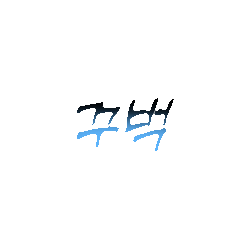

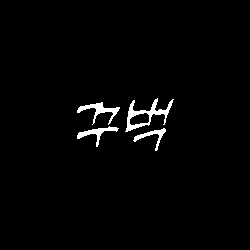

(250, 250, 4)


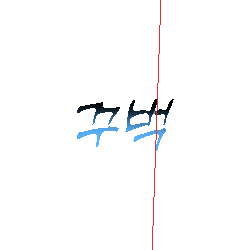

검사된 픽셀 값: [array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([ 66,  47,  24, 255], dtype=uint8), array([ 56,  40,  20, 255], dtype=uint8), array([ 47,  35,  18, 255], dtype=uint8), array([ 41,  30,  16, 255], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([  4,   3,   1, 255], dtype=uint8), array([  3,   2,   1, 255], dtype=uint8), array([  2,   1,   1, 255], dtype=uint8), array([  1,   1

In [41]:
cv2_imshow(erd_image)

# 이미지의 중심 좌표 설정
center = (erd_image.shape[1] // 1.6, erd_image.shape[0] // 2)   # 소수 가능

# 주어진 각도로 이미지의 픽셀 검사 (예: 45도, 간격 1 픽셀)
angle_deg = int(angle)
step_size = 1

cv2_imshow(a)


inspected_pixels = inspect_pixels_along_angle(erd_image, center, angle_deg, step_size)

# 검사된 픽셀 값 출력
print("검사된 픽셀 값:", inspected_pixels)

farthest_pixels = find_farthest_pixels(inspected_pixels)
print("가장 먼 두 개의 픽셀 값:", farthest_pixels)

## 4. 번역된 글자로 텍스트를 만들고(ex. 영어) 해당 텍스트를 포함하는 가장 작은 직사각형을 그림

In [ ]:
font = ""


In [42]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter, ImageEnhance
import random
import cv2
import numpy as np

In [ ]:
# {
#     style_class:"strglow",
#     font_color_type:GRADIENT,
#     font_color:[],
#     offsets:[ {
#         style:"stroke",
#         offset:20,
#         color_type:GRADIENT,
#         color:[30, #123453, #213453],
#     },
#     {
#         style:"glow",
#         offset:20,
#         color_Type:SIGNLE,
#         color:#123435,
#     }
#     ]
# }

In [108]:
json_data = {
    "style_class": "str",
    "font_color_type": "GRADIENT",
    "font_size": 120,
    "font_color": [272, (4, 3, 1), (221, 158, 82)],
    "offsets": [
        {
            "style": "stroke",
            "offset": 5,
            "color_type": "SINGLE",
            "color": [(0, 0, 0)],
        }
    ]
}

In [59]:
def draw_gradient_rect(image, start_color, end_color, angle):
    """
    그라데이션 직사각형을 그리는 함수
    :param image: 이미지를 저장할 배열
    :param start_color: 시작 색상 (B, G, R)
    :param end_color: 끝 색상 (B, G, R)
    :param angle: 그라데이션의 각도 (도 단위)
    """
    height, width = image.shape[:2]

    # 그라데이션을 저장할 빈 이미지 생성
    gradient = np.zeros((height, width, 3), dtype=np.uint8)

    # 각도에 따른 방향 벡터 계산
    angle_rad = np.radians(angle)
    cos_a = np.cos(angle_rad)
    sin_a = np.sin(angle_rad)

    # 그라데이션 색상 채우기
    for y in range(height):
        for x in range(width):
            # 픽셀 위치에서의 비율 계산
            px = x * cos_a + y * sin_a
            ratio = px / (width * cos_a + height * sin_a)
            ratio = np.clip(ratio, 0, 1)

            # 시작 색상과 끝 색상 사이의 보간
            color = start_color * (1 - ratio) + end_color * ratio
            gradient[y, x] = color

    # 그라데이션 이미지를 원본 이미지에 적용
    np.copyto(image, gradient)

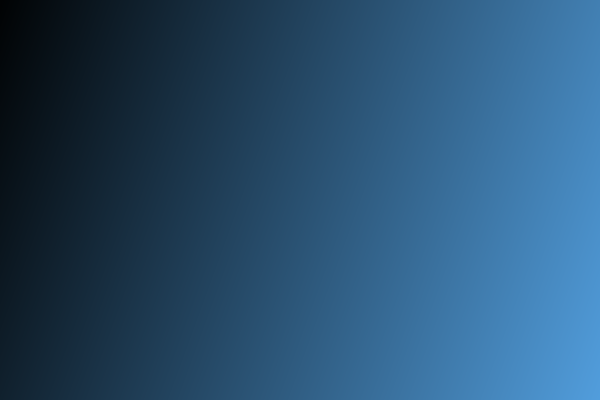

In [60]:
# 빈 이미지 생성 (흰색 배경)
image = np.ones((400, 600, 3), dtype=np.uint8) * 255

# JSON 데이터에서 값 추출
start_color = np.array([4, 3, 1])  # (B, G, R)
end_color = np.array([221, 158, 82])  # (B, G, R)
angle = 20  # 각도

# 그라데이션 직사각형 그리기
draw_gradient_rect(image, start_color, end_color, angle)

# 결과 이미지를 image2에 저장
image2 = image.copy()

# 결과 이미지 출력
cv2_imshow(image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [109]:
def create_basic_stroke(json_data, font_path, text, save_path):
    # 일단 임시적으로 세팅을 이렇게 함
    color_list = [(50, 50, 50, 255), (150, 150, 150, 255)]

    # 이미지 생성
    img = Image.new(mode='RGBA', size=(800, 800), color=(0, 0, 0, 0))
    draw = ImageDraw.Draw(img)

    # 텍스트 배치 위치
    x = img.width//2
    y = img.height//2

    # 색상 설정
    fill_color, stroke_color = color_list[0], color_list[1]

    # 스타일 수치 설정
    stroke_offset = ""
    for offset in json_data["offsets"]:
        if offset["style"] == "stroke":
            stroke_offset = offset["offset"]
            break
    print("stroke_offset: ", stroke_offset)
    # stroke_offset = 80

    # 폰트 사이즈 랜덤 선택
    font_size = json_data["font_size"]
    # font_size = 200
    print("font_size: ", font_size)

    # 폰트 생성
    font = ImageFont.truetype(font_path, font_size)
    # font = ImageFont.truetype(ImageFont.load_default(), font_size)

    # 테두리 그리기
    draw.text((x, y), text, font=font, anchor='mm', fill=fill_color, stroke_width=stroke_offset, stroke_fill=stroke_color)

    # 이미지 저장
    # img_path = f'{self.img_dir_path}/{font_name}_{text}_{font_size}_str.png'
    img.save(save_path, format='PNG')
    img.show()

In [111]:
font_path = "DroidSansMonoSlashed.ttf"
text = "nod"
output_path = "output_image1.png"

create_basic_stroke(json_data, font_path, text, output_path)

stroke_offset:  5
font_size:  120


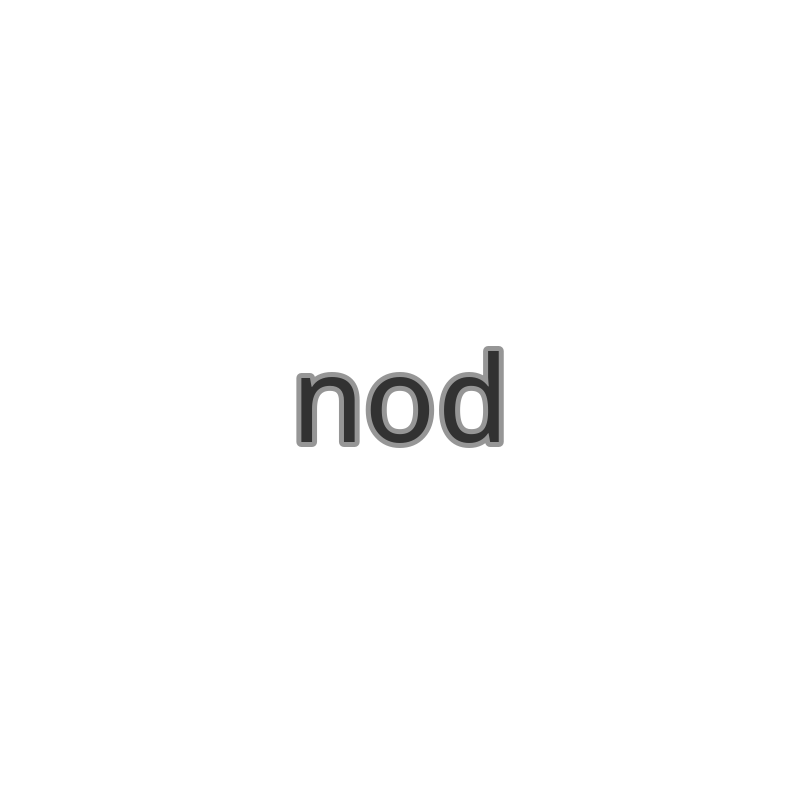

In [114]:
pillow_image = Image.open(output_path)

# Pillow 이미지를 NumPy 배열로 변환 (RGB 채널 순서)
numpy_image = np.array(pillow_image)

# RGB를 BGR로 색상 채널 순서 변경
opencv_image = cv2.cvtColor(numpy_image, cv2.COLOR_RGBA2BGRA)
cv2_imshow(opencv_image)

## 5. 4에서 구한 직사각형에 아까 구한 정보로 그라데이션을 구현

In [125]:
def get_minimum_rect(image):
    # 알파 채널 추출
    alpha_channel = image[:, :, 3]

    # 알파 채널에서 값이 0이 아닌 부분의 좌표 찾기
    nonzero_coords = np.argwhere(alpha_channel > 0)

    # 최소 바운딩 박스 계산
    top_left = np.min(nonzero_coords, axis=0)
    bottom_right = np.max(nonzero_coords, axis=0)

    # 가로와 세로 너비 계산
    width = bottom_right[1] - top_left[1]
    height = bottom_right[0] - top_left[0]

    print("가로 너비:", width)
    print("세로 너비:", height)
    return width, height

In [126]:
width, height = get_minimum_rect(opencv_image)
print(width, heigh)

가로 너비: 207
세로 너비: 101
207 101


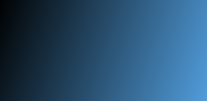

In [128]:
image = np.ones((height, width, 3), dtype=np.uint8) * 255

# JSON 데이터에서 값 추출
start_color = np.array([4, 3, 1])  # (B, G, R)
end_color = np.array([221, 158, 82])  # (B, G, R)

draw_gradient_rect(image, start_color, end_color, angle)
# 결과 이미지를 image2에 저장
image2 = image.copy()

# 결과 이미지 출력
cv2_imshow(image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

6번 할 차례